In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df=pd.read_csv('data/mouse_drug_data.csv')
clinical_df=pd.read_csv('data/clinicaltrial_data.csv')            

# Combine the data into a single dataset
merge_df =pd.merge(mouse_df,clinical_df,on=('Mouse ID'))



# Display the data table for preview
merge_df.head(3)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = merge_df.groupby(["Drug" ,"Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume.reset_index("Drug"))

# Preview DataFrame
# Preview DataFrame

mean_tumor_volume_df.head()

,Drug,Tumor Volume (mm3)
Timepoint,,
0,Capomulin,45.000000
5,Capomulin,44.266086
10,Capomulin,43.084291
15,Capomulin,42.064317
20,Capomulin,40.716325


In [4]:
#create a pivot table
mean_tumor_volume_organized = mean_tumor_volume_df.pivot(columns="Drug", values="Tumor Volume (mm3)")
mean_tumor_volume_organized

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_SE = merge_df.groupby(["Drug" ,"Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_volume_SE_df =tumor_volume_SE.reset_index("Drug")

# Preview DataFrame
tumor_volume_SE_df.head()


,Drug,Tumor Volume (mm3)
Timepoint,,
0,Capomulin,0.000000
5,Capomulin,0.448593
10,Capomulin,0.702684
15,Capomulin,0.838617
20,Capomulin,0.909731


In [6]:
#create a pivot table for the sem
tumor_volume_SE_organized = tumor_volume_SE_df.pivot(columns="Drug", values="Tumor Volume (mm3)")
#preview pivot table
tumor_volume_SE_organized


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [7]:
druglist=['Capomulin','Infubinol','Ketapril','Placebo']
markers=['o','*','s','^']

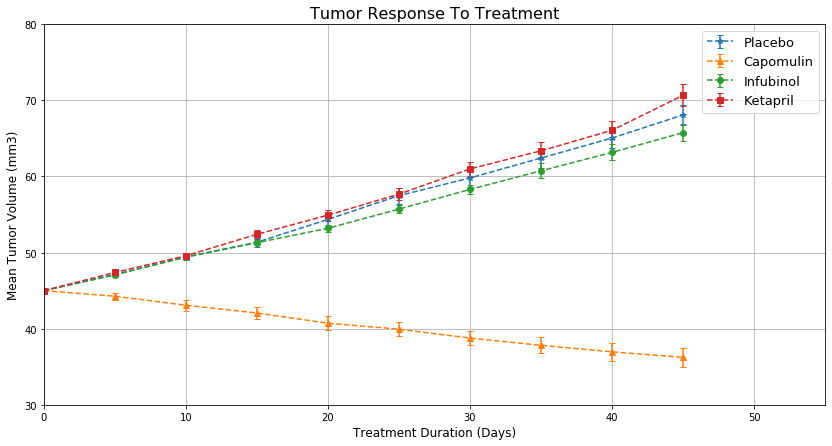

In [8]:
#generate plot 
fig=plt.figure(figsize=(14,7))
plt.errorbar(mean_tumor_volume_organized.index,mean_tumor_volume_organized.Placebo , yerr=tumor_volume_SE_organized.Placebo,marker="*",capsize = 3,label='Placebo',ls='--')
plt.errorbar(mean_tumor_volume_organized.index,mean_tumor_volume_organized.Capomulin , yerr=tumor_volume_SE_organized.Capomulin,marker="^",capsize = 3,label='Capomulin',ls='--')
plt.errorbar(mean_tumor_volume_organized.index,mean_tumor_volume_organized.Infubinol , yerr=tumor_volume_SE_organized.Infubinol,marker="o",capsize = 3,label='Infubinol',ls='--')
plt.errorbar(mean_tumor_volume_organized.index,mean_tumor_volume_organized.Ketapril , yerr=tumor_volume_SE_organized.Ketapril,marker="s",capsize = 3,label='Ketapril',ls='--')


plt.title("Tumor Response To Treatment",size = 16)
plt.xlabel("Treatment Duration (Days)",size = 12)
plt.ylabel("Mean Tumor Volume (mm3)",size = 12)
plt.legend(loc="best",fontsize=13)
plt.axis(xmin=0, xmax=55, ymin=30, ymax=80)
plt.grid()
#savefigure
plt.savefig(fname='Treatment Response.png')
#preview figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic = merge_df.groupby(["Drug" ,"Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
mean_metastatic_df = mean_metastatic.reset_index("Drug")

# Preview DataFrame
mean_metastatic_df.head()

,Drug,Metastatic Sites
Timepoint,,
0,Capomulin,0.000000
5,Capomulin,0.160000
10,Capomulin,0.320000
15,Capomulin,0.375000
20,Capomulin,0.652174


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mean_metastatic_SE = merge_df.groupby(["Drug" ,"Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
mean_metastatic_SE_df = mean_metastatic_SE.reset_index("Drug")

# Preview DataFrame
mean_metastatic_SE_df.head()

,Drug,Metastatic Sites
Timepoint,,
0,Capomulin,0.000000
5,Capomulin,0.074833
10,Capomulin,0.125433
15,Capomulin,0.132048
20,Capomulin,0.161621


In [11]:
#create a pivot 
mean_metastatic_organized = mean_metastatic_df.pivot(columns="Drug", values="Metastatic Sites")
# Preview that Reformatting worked
mean_metastatic_organized.head()
                                                     

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
#create a pivot table
mean_metastatic_SE_organized = mean_metastatic_SE_df.pivot(columns="Drug", values="Metastatic Sites")
#preview the pivot
mean_metastatic_SE_organized



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


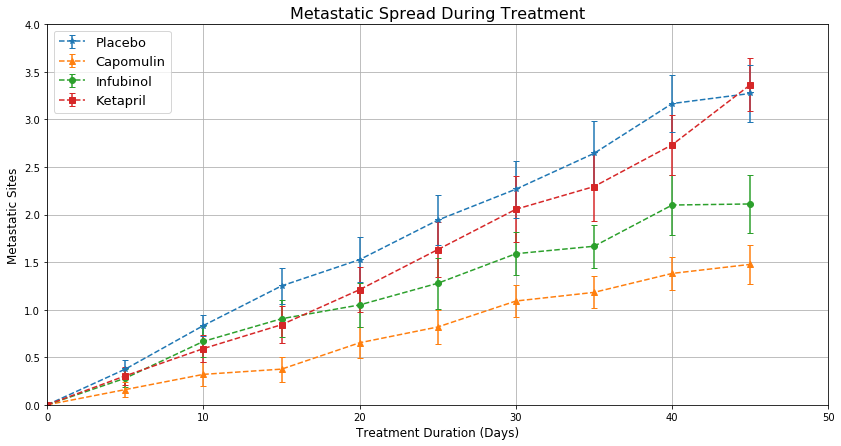

In [13]:
#generate a plot
fig=plt.figure(figsize=(14,7))
plt.errorbar(mean_metastatic_organized.index,mean_metastatic_organized.Placebo , yerr=mean_metastatic_SE_organized.Placebo,marker="*",capsize = 3,label='Placebo',ls='--')
plt.errorbar(mean_metastatic_organized.index,mean_metastatic_organized.Capomulin , yerr=mean_metastatic_SE_organized.Capomulin,marker="^",capsize = 3,label='Capomulin',ls='--')
plt.errorbar(mean_metastatic_organized.index,mean_metastatic_organized.Infubinol , yerr=mean_metastatic_SE_organized.Infubinol,marker="o",capsize = 3,label='Infubinol',ls='--')
plt.errorbar(mean_metastatic_organized.index,mean_metastatic_organized.Ketapril , yerr=mean_metastatic_SE_organized.Ketapril,marker="s",capsize = 3,label='Ketapril',ls='--')

#Format Plot
plt.title("Metastatic Spread During Treatment",size = 16)
plt.xlabel("Treatment Duration (Days)",size = 12)
plt.ylabel("Metastatic Sites",size = 12)
plt.legend(loc="best",fontsize=13)
plt.axis(xmin=0, xmax=50, ymin=0, ymax=4)
plt.grid()
#savefigure
plt.savefig(fname="Metastatic Spread.png")
#preview plot
plt.show()

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival=merge_df.groupby(["Drug", "Timepoint"],as_index=False)
survival.head()
survival['Mouse ID'].count()
# Convert to DataFrame
survival_df=pd.DataFrame(survival['Mouse ID'].count())
# Preview DataFrame
survival_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
pivot_survival=survival_df.pivot(index='Timepoint', columns='Drug')['Mouse ID']

# Preview the Data Frame
pivot_survival

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [16]:
orig_mice = survival_df.loc[(survival_df["Timepoint"] == 0),:]
orig_mice.rename(columns={'Mouse ID':'total_mice'},inplace = True)
del orig_mice['Timepoint']
orig_mice
#merge dfs
merge_survival = pd.merge(survival_df, orig_mice, on="Drug")
merge_survival.head()
#find percentage still alive
merge_survival["percent_alive"] = merge_survival['Mouse ID'] / merge_survival['total_mice'] * 100
#preview data
merge_survival.head()

,Drug,Timepoint,Mouse ID,total_mice,percent_alive
0,Capomulin,0,25,25,100.0
1,Capomulin,5,25,25,100.0
2,Capomulin,10,25,25,100.0
3,Capomulin,15,24,25,96.0
4,Capomulin,20,23,25,92.0


In [17]:
merge_survival

,Drug,Timepoint,Mouse ID,total_mice,percent_alive
0,Capomulin,0,25,25,100.0
1,Capomulin,5,25,25,100.0
2,Capomulin,10,25,25,100.0
3,Capomulin,15,24,25,96.0
4,Capomulin,20,23,25,92.0
...,...,...,...,...,...
95,Zoniferol,25,16,25,64.0
96,Zoniferol,30,15,25,60.0
97,Zoniferol,35,14,25,56.0
98,Zoniferol,40,14,25,56.0


In [18]:
mouse_count = merge_df.groupby(['Drug', 'Timepoint'])['Timepoint'].count()
mouse_count.head()

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Timepoint, dtype: int64

In [19]:
#create lists for each drug
cap_surv_list = mouse_count.loc['Capomulin'].tolist()
inf_surv_list = mouse_count.loc['Infubinol'].tolist()
ket_surv_list = mouse_count.loc['Ketapril'].tolist()
plc_surv_list = mouse_count.loc['Placebo'].tolist()

In [20]:
# List comprehension to get the mouse survival rate
# Each value in the lists is divided by the first value of the respective list to get a percentage
cap_survrate = [(x/cap_surv_list[0])*100 for x in cap_surv_list]
inf_survrate = [(x/inf_surv_list[0])*100 for x in inf_surv_list]
ket_survrate = [(x/ket_surv_list[0])*100 for x in ket_surv_list]
plc_survrate = [(x/plc_surv_list[0])*100 for x in plc_surv_list]

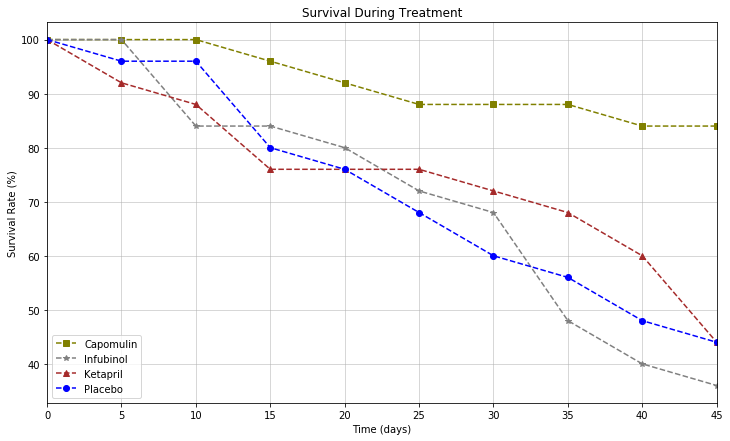

In [21]:
# Generate the Plot (Accounting for percentages)

# Scatter plot showing mouse survival rate over time for each treatment
fig=plt.figure(figsize=(12,7))
ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Survival During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")

# Plot the 'mean' list vs. the established x axis with error 
ax.plot(x_axis, cap_survrate, color="olive", label="Capomulin",marker='s',linestyle='--')
ax.plot(x_axis, inf_survrate, color="gray", label="Infubinol",marker='*',linestyle='--')
ax.plot(x_axis, ket_survrate, color="brown", label="Ketapril",marker='^',linestyle='--')
ax.plot(x_axis, plc_survrate, color="blue", label="Placebo",marker='o',linestyle='--')

# Add the legend and gridlines
ax.legend(loc=3)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('on', which='major', axis='both', linestyle='-', linewidth=0.5)

plt.xlim(0, max(x_axis))
        
# Save the Figure
plt.savefig(fname='Survival During Treatment.png')
# Show the Figure
plt.show()

## Summary Bar Graph

In [22]:
# Calculate the percent changes for each drug

# Drop intermediate Timepoints, keeping only first (0) and last (45)
start_end_df =mean_tumor_volume_organized.drop([5,10,15,20,25,30,35,40], axis = 0)

# Add a calculated row for Percent Change
pct_response_df = start_end_df.append( (start_end_df.loc[45,:] - start_end_df.loc[0,:]) / start_end_df.loc[0,:] * 100, ignore_index=True)

# Drop rows for Timepoints 0 and 45, keeping only the Percent Change row
pct_response_df.drop([0,1], axis = 0, inplace = True)

# Transpose the DataFrame
pct_response_df = pct_response_df.transpose()

# Rename the Percent Change column
pct_response_df = pct_response_df.rename(columns={2:"Percent Change"})

# Preview DataFrame
pct_response_df.head()

,Percent Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347


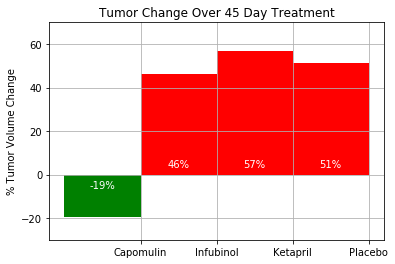

In [24]:
# Store all Relevant Percent Changes into a Tuple
pct_response_final_df = pct_response_df.drop(["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], axis = 0)

# Splice the data between passing and failing drugs
pct_response_passing_df = pct_response_final_df[pct_response_final_df["Percent Change"] <= 0]
pct_response_failing_df = pct_response_final_df[pct_response_final_df["Percent Change"] > 0]

# Plot data
fig, ax = plt.subplots()
rects1 = ax.bar(pct_response_passing_df.index.values, pct_response_passing_df["Percent Change"], color = 'g',width=-1, align="edge")
rects2 = ax.bar(pct_response_failing_df.index.values, pct_response_failing_df["Percent Change"], color = 'r',width=-1, align="edge")

# Orient widths. Add labels, tick marks, etc. 
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.grid()
ax.set_yticks([-20, 0, 20, 40, 60])
ax.set_ylim(-30, 70)

# Use functions to label the percentages of changes
def autolabel(rects, ax):
    """
    Attach a text label inside the base of each bar displaying its height
    """
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If the height is positive, place label above x axis;
        # otherwise, put it below the x axis.
        if height > 0:
            label_position = y_height * 0.05
        else:
            label_position = -y_height * 0.05

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height) + "%",
                ha='center', va='center', color='white')
        
# Call functions to implement the function calls
autolabel(rects1,ax)
autolabel(rects2,ax)

# Save the Figure
plt.savefig(fname="Summary figure")
#preview figure
plt.show()